In [28]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 12

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'png'

from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

In [29]:
df = pd.read_csv('churn.csv')

In [30]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,...,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,...,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,...,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,...,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,...,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,...,8.41,10.1,3,2.73,3,False


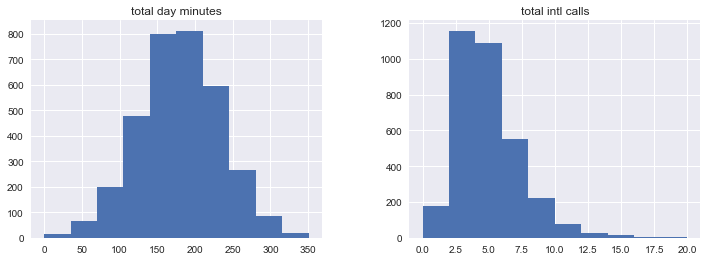

In [31]:
features = ['total day minutes', 'total intl calls']
df[features].hist(figsize=(12, 4));

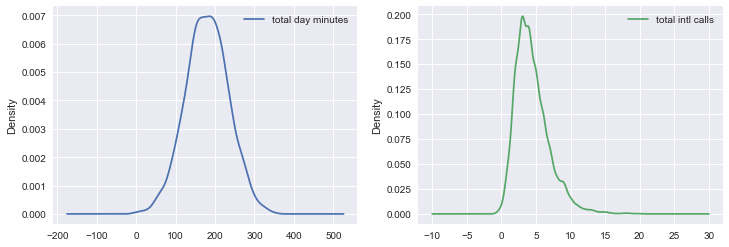

In [32]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), sharex=False, figsize=(12, 4));

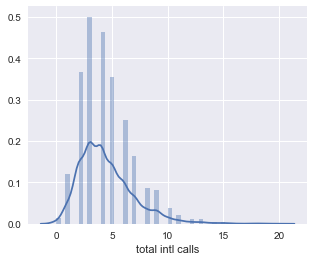

In [33]:
sns.distplot(df['total intl calls']);

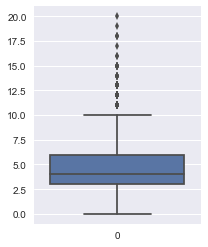

In [34]:
_, ax = plt.subplots(figsize=(3, 4))
sns.boxplot(data=df['total intl calls'], ax=ax)

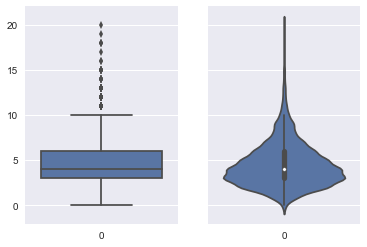

In [35]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['total intl calls'], ax=axes[0]);
sns.violinplot(data=df['total intl calls'], ax=axes[1])

In [36]:
df[features].describe()

,total day minutes,total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


In [37]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

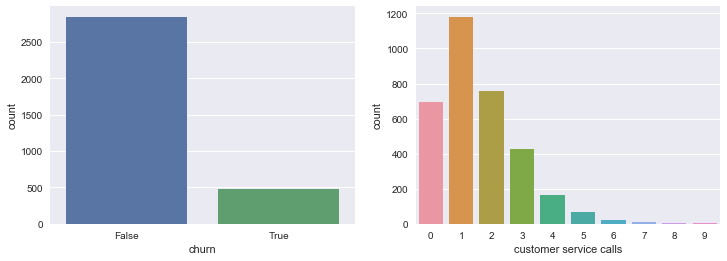

In [38]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x='churn', data=df, ax=axes[0])
sns.countplot(x='customer service calls', data=df, ax=axes[1]);

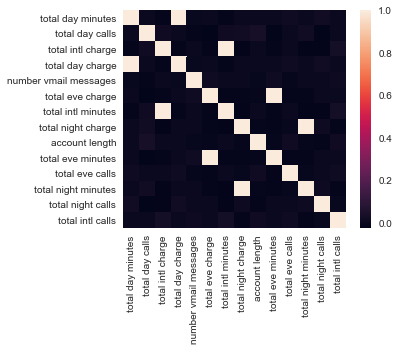

In [39]:
numerical = list(set(df.columns) - set(['state', 'international plan', 'voice mail plan', 'area code', 
                                        'churn', 'customer service calls']))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

In [40]:
numerical = list(set(numerical) - set(['total day charge', 'total eve charge', 'total night charge', 'total intl charge']))

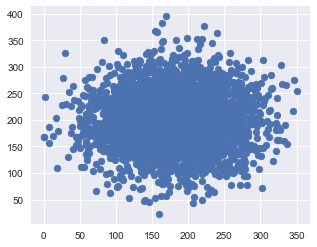

In [41]:
plt.scatter(df['total day minutes'], df['total night minutes']);

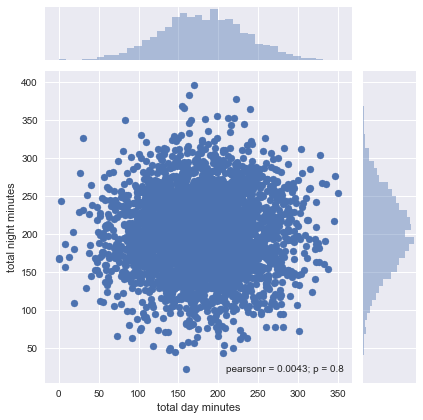

In [42]:
sns.jointplot(x='total day minutes', y='total night minutes', data=df, kind='scatter');

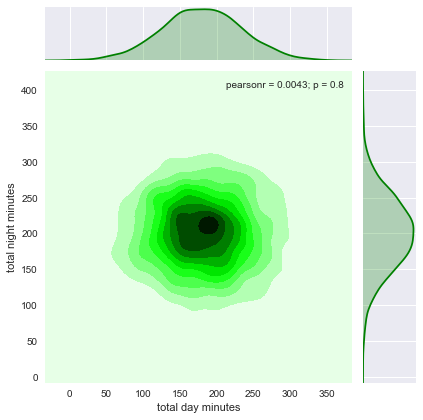

In [43]:
sns.jointplot('total day minutes', 'total night minutes', data=df, kind='kde', color='g');

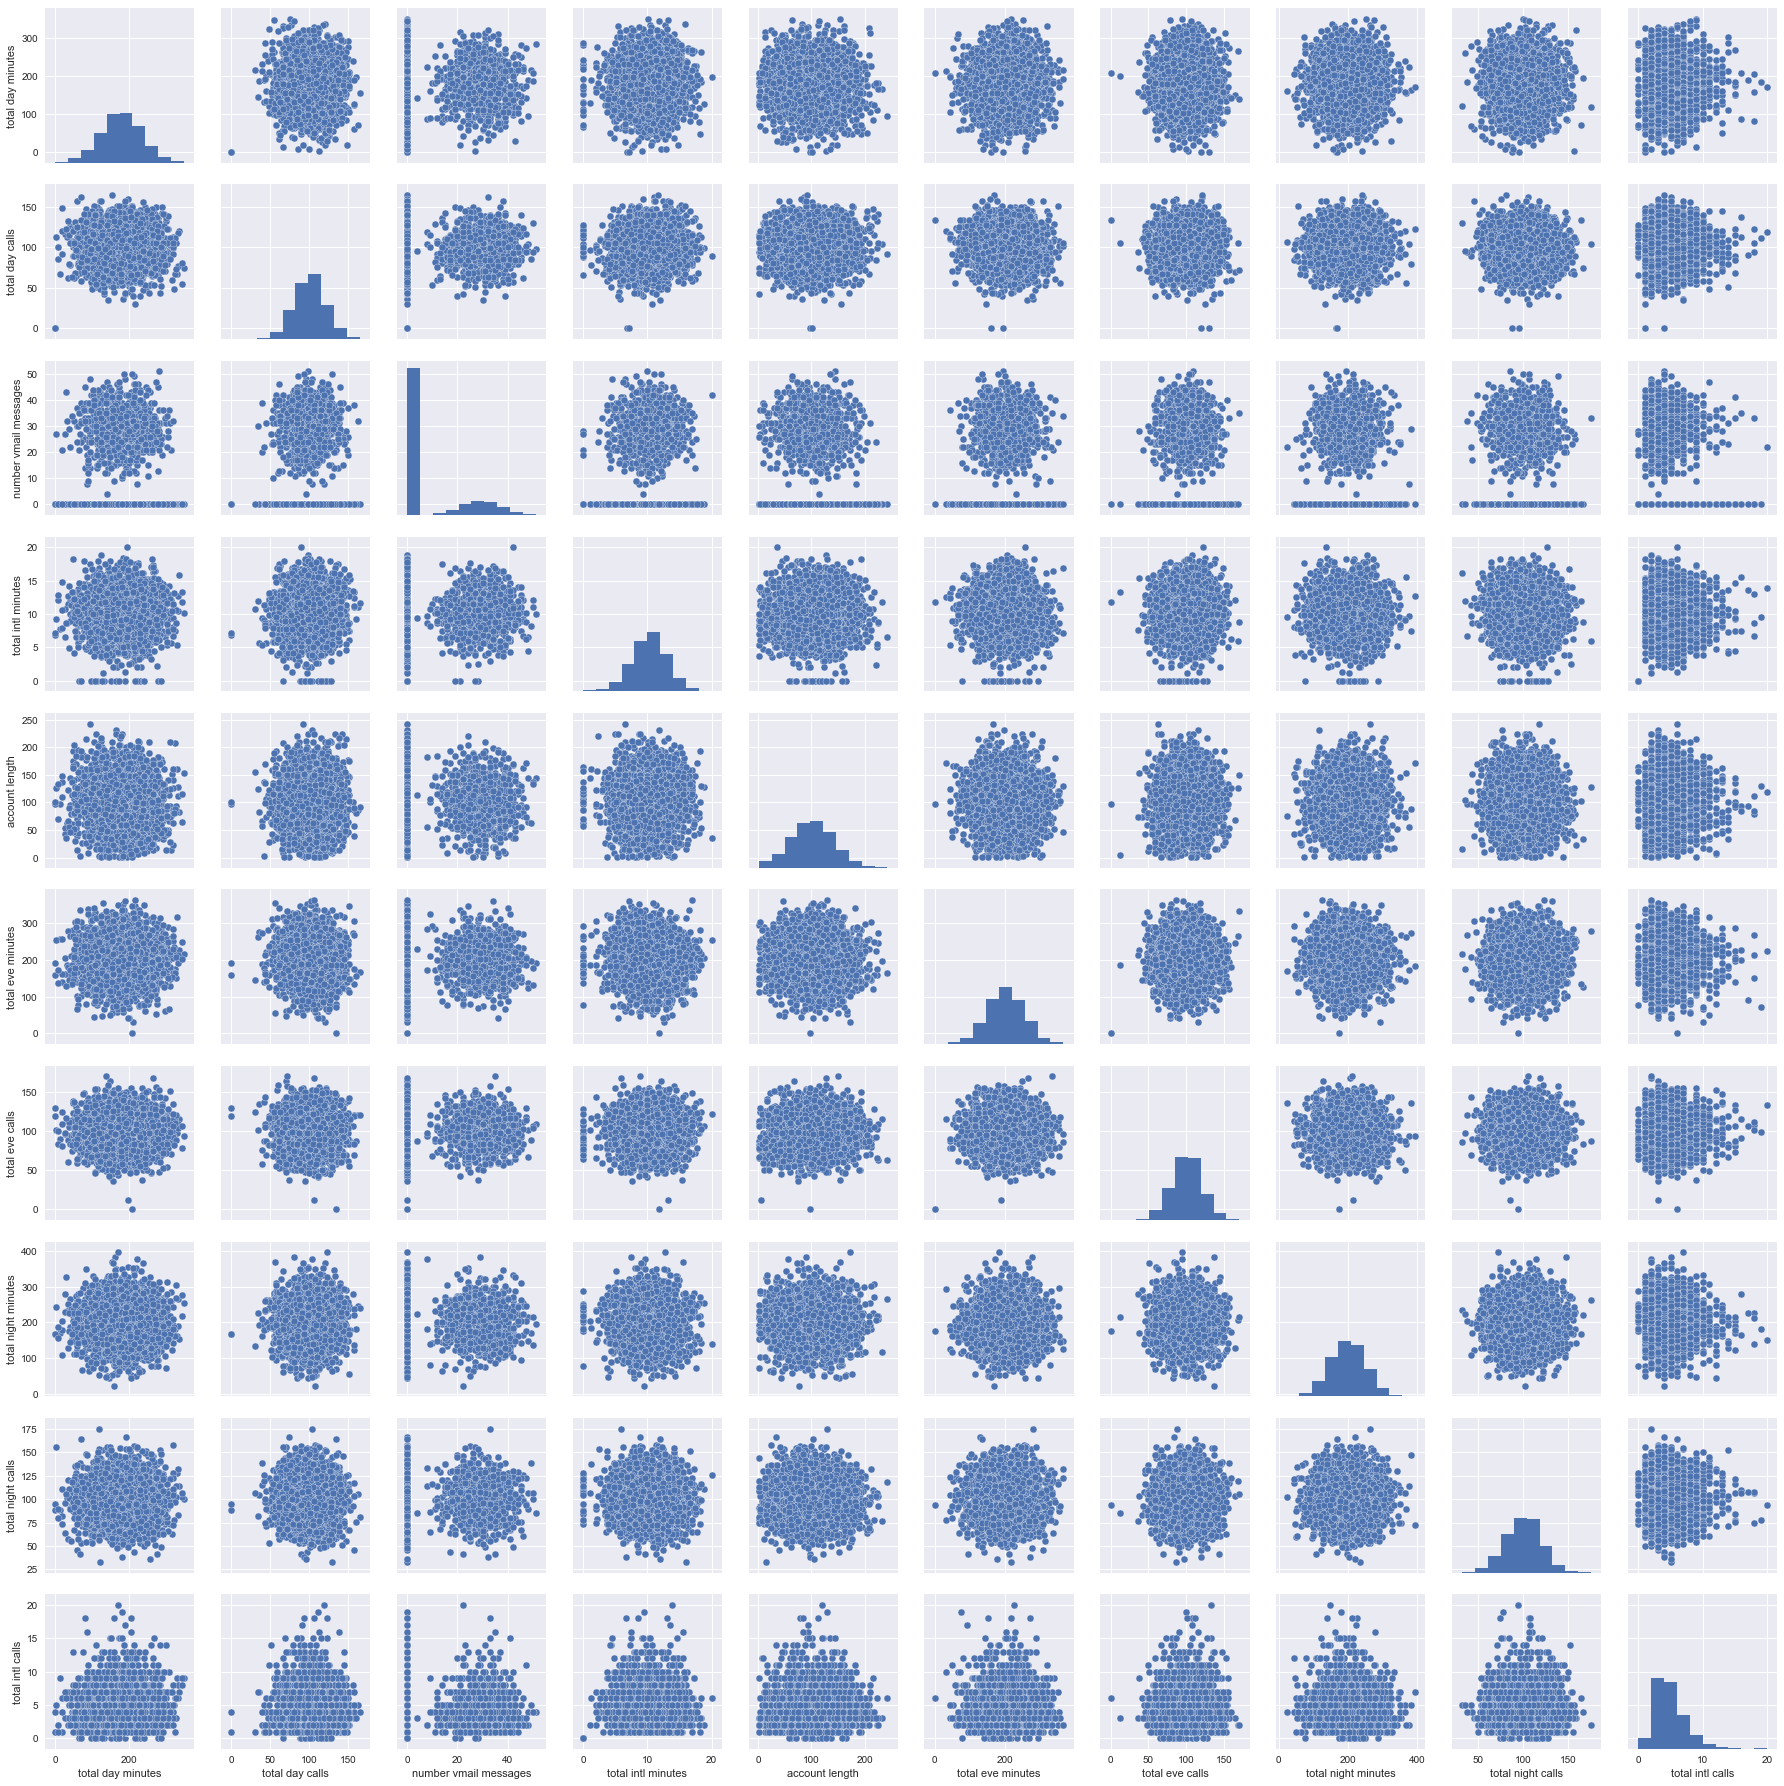

In [44]:
sns.pairplot(df[numerical]);

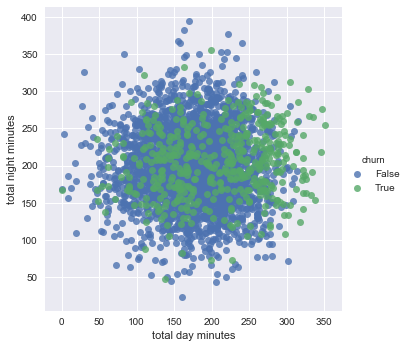

In [46]:
sns.lmplot('total day minutes', 'total night minutes', data=df, hue='churn', fit_reg=False);

IndexError: index 3 is out of bounds for axis 0 with size 3

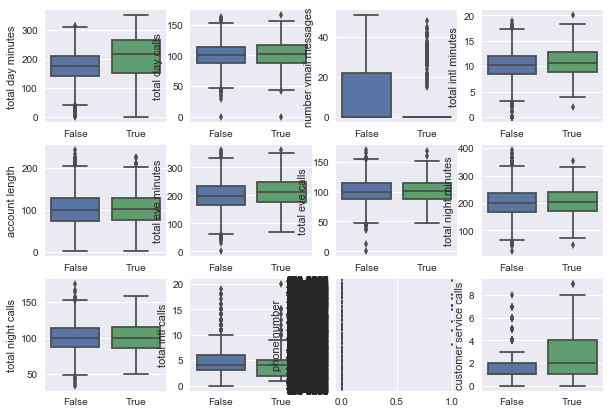

In [49]:
# Sometimes you can analyze an ordinal variable as numerical one
numerical.append('customer service calls') 
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical): 
    ax = axes[int(idx / 4), idx % 4] 
    sns.boxplot(x='churn', y=feat, data=df, ax=ax) 
    ax.set_xlabel('') 
    ax.set_ylabel(feat) 
fig.tight_layout();

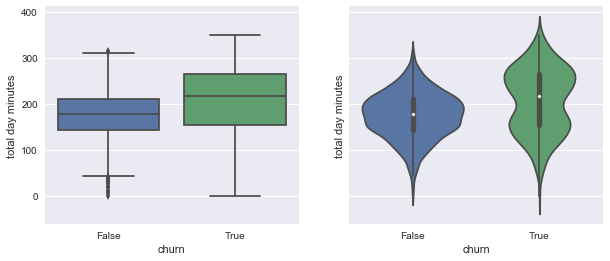

In [50]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
sns.boxplot(x='churn', y='total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='churn', y='total day minutes', data=df, ax=axes[1]);

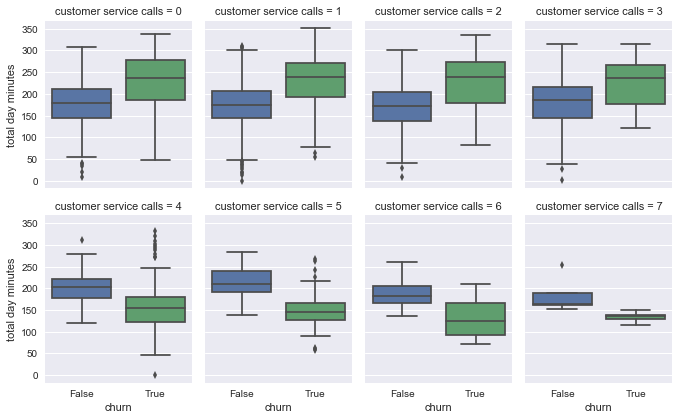

In [51]:
sns.factorplot(x='churn', y='total day minutes', 
               col='customer service calls', 
               data=df[df['customer service calls'] < 8], kind='box', col_wrap=4, size=3, aspect=.8);

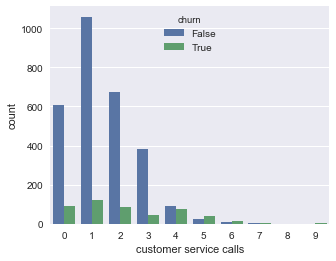

In [52]:
sns.countplot(x='customer service calls', hue='churn', data=df);

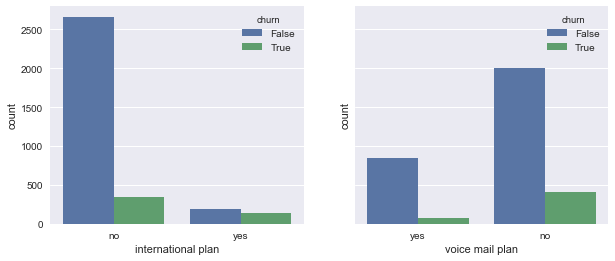

In [53]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
sns.countplot(x='international plan', hue='churn', data=df, ax=axes[0]);
sns.countplot(x='voice mail plan', hue='churn', data=df, ax=axes[1]);

In [54]:
pd.crosstab(df['state'], df['churn']).T

state,AK,AL,AR,AZ,CA,CO,...,VA,VT,WA,WI,WV,WY
churn,,,,,,,,,,,,,
False,49,72,44,60,25,57,...,72,65,52,71,96,68
True,3,8,11,4,9,9,...,5,8,14,7,10,9


In [55]:
df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

state,NJ,CA,TX,MD,SC,MI,...,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,...,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


In [56]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [86]:
X = df.drop(['churn', 'state', 'phone number'], axis=1)
X['international plan'] = X['international plan'].map({'yes': 1, 'no': 0})
X['voice mail plan'] = X['voice mail plan'].map({'yes': 1, 'no': 0})

In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
%%time 
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 1min 30s, sys: 5.24 s, total: 1min 35s
Wall time: 1min 36s


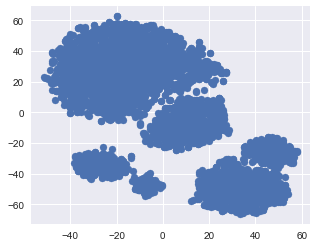

In [92]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1]);

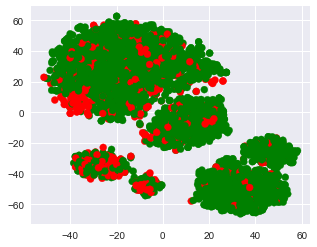

In [93]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df['churn'].map({False: 'green', True: 'red'}));

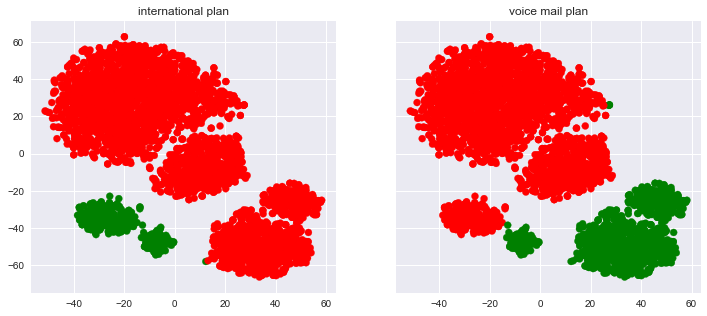

In [94]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
for i, name in enumerate(['international plan', 'voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1],
                    c=df[name].map({'yes': 'green', 'no': 'red'}))
    axes[i].set_title(name)